### 12.
Use the marco geoestadístico 2010
(https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=889463807469) and
2020 (https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=702825292812) to
obtain the “Áreas Geoestadísticas Básicas” (AGEBs) from Mérida, Yucatán. AGEBs
evolve on time. Use sets to find:
a. AGEBs which remains from 2010 on 2020.
b. New AGEBs on 2020.
c. AGEBs that disappear from 2010 to 2020.
Make a map with the following visualization to observe all three cases.

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

mexico2010 = gpd.read_file('data\AGEB_urb_2010_5.shp')

mexico2010["ENT"] = mexico2010['CVEGEO'].str.slice(0,2)
mexico2010["MUN"] = mexico2010["CVEGEO"].str.slice(2,5)

yucatan2010 = mexico2010[mexico2010['ENT'] == '31']
merida = yucatan2010[yucatan2010["MUN"]=="050"]

yc_2020 = gpd.read_file('data\\31a.shp')

merida2020 = yc_2020[yc_2020["CVE_MUN"] == "050"]

merida_set = set(merida['CVEGEO'])
merida2020_set = set(merida2020['CVEGEO'])

In [17]:
mexico2010.head()

,CODIGO,CVEGEO,GEOGRAFICO,FECHAACT,GEOMETRIA,INSTITUCIO,OID,geometry,ENT,MUN
0,LA_6052,0100100013204,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,1,"POLYGON ((2475018.434 1098724.434, 2475012.982...",01,001
1,LA_6052,0100100013721,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,2,"POLYGON ((2475469.244 1098964.293, 2475431.454...",01,001
2,LA_6052,0100100010657,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,3,"POLYGON ((2470787.576 1096193.647, 2470787.327...",01,001
3,LA_6052,0100100011528,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,4,"POLYGON ((2470709.683 1097766.390, 2470705.629...",01,001
4,LA_6052,0100100011674,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,5,"POLYGON ((2466998.954 1095069.117, 2467001.023...",01,001


In [18]:
merida.head()

,CODIGO,CVEGEO,GEOGRAFICO,FECHAACT,GEOMETRIA,INSTITUCIO,OID,geometry,ENT,MUN
53392,LA_6052,310500001516A,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53393,"POLYGON ((3779011.482 1044206.738, 3779006.208...",31,050
53393,LA_6052,3105000012625,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53394,"POLYGON ((3774738.557 1051086.957, 3774742.268...",31,050
53394,LA_6052,3105000012697,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53395,"POLYGON ((3774600.177 1053733.617, 3774614.671...",31,050
53395,LA_6052,3105000013572,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53396,"POLYGON ((3774145.121 1052822.459, 3774195.333...",31,050
53396,LA_6052,3105000015649,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53397,"POLYGON ((3774614.438 1051099.182, 3774607.695...",31,050


In [19]:
merida2020.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
412,3105000015329,31,050,0001,5329,"POLYGON ((3779478.623 1047307.492, 3779480.973..."
413,3105000012466,31,050,0001,2466,"POLYGON ((3777875.435 1056949.722, 3777947.632..."
414,310500001249A,31,050,0001,249A,"POLYGON ((3779713.782 1053802.753, 3779711.800..."
415,3105000015827,31,050,0001,5827,"POLYGON ((3772091.762 1052572.146, 3772125.684..."
416,3105000014706,31,050,0001,4706,"POLYGON ((3772829.128 1047931.320, 3772821.774..."


In [20]:
yucatan2010.head()

,CODIGO,CVEGEO,GEOGRAFICO,FECHAACT,GEOMETRIA,INSTITUCIO,OID,geometry,ENT,MUN
52973,LA_6052,3100100010130,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,52974,"POLYGON ((3776839.076 1015624.342, 3776863.810...",31,001
52974,LA_6052,3100100010126,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,52975,"POLYGON ((3776247.741 1014594.337, 3776229.180...",31,001
52975,LA_6052,3100100010111,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,52976,"POLYGON ((3776886.893 1014389.348, 3776885.095...",31,001
52976,LA_6052,3100100010164,ÁREA GEOESTADÍSTICA BÁSICA,08/2010,ÁREA,INEGI,52977,"POLYGON ((3776058.187 1014722.134, 3776141.758...",31,001
52977,LA_6052,3100100010145,ÁREA GEOESTADÍSTICA BÁSICA,08/2010,ÁREA,INEGI,52978,"POLYGON ((3776616.765 1015514.116, 3776745.478...",31,001


In [6]:
igual = merida_set.intersection(merida2020_set)
igual = merida[merida['CVEGEO'].isin(igual)]

cambios = merida2020_set - merida_set
cambios = merida2020[merida2020['CVEGEO'].isin(cambios)]

desaparecio = merida_set - merida2020_set
desaparecio = merida[merida['CVEGEO'].isin(desaparecio)]

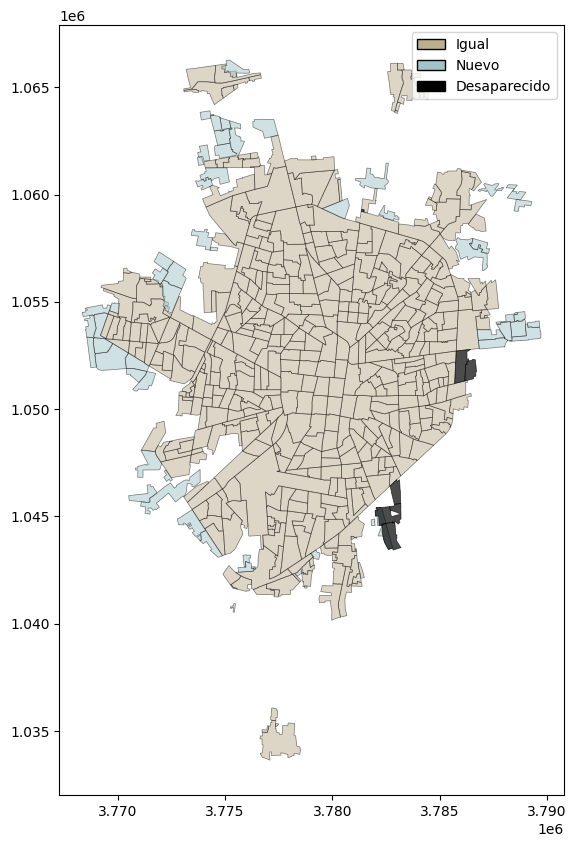

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

igual.plot(ax=ax, color='#BDAE8F', edgecolor='black', linewidth=0.5, alpha=0.5, label='Igual')
cambios.plot(ax=ax, color='#A2C4C9', edgecolor='black', linewidth=0.5, alpha=0.5, label='Nuevo')
desaparecio.plot(ax=ax, color='black', edgecolor='black', linewidth=0.5, alpha=0.7, label='Desaparecido')
legend_elements = [Patch(facecolor='#BDAE8F', edgecolor='black', label='Igual'),
                     Patch(facecolor='#A2C4C9', edgecolor='black', label='Nuevo'),
                     Patch(facecolor='black', edgecolor='black', label='Desaparecido')]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()